# Machine Learning Models

Logistic Regression, Random Forest, XGBoost, other tree based models, Naive Bayes

In [1]:
#Import packages and set formatting options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Read CSV File

In [2]:
df = pd.read_csv('feature_selected_train.csv')
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,Higher education,0.0000,Core staff,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,Secondary / secondary special,0.0000,Drivers,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,Secondary / secondary special,0.1060,Laborers,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,Secondary / secondary special,0.0000,Laborers,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,Secondary / secondary special,0.0045,Drivers,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0


In [3]:
df.shape

(80603, 23)

## Categorical Variable Encoding
After examining the cleaned and reduced training set, there are still two categorical variables that will need to be encoded before applying any machine learning models. Let's examine those first.

In [4]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    54306
Higher education                 22086
Incomplete higher                 3530
Lower secondary                    633
Academic degree                     48
Name: NAME_EDUCATION_TYPE, dtype: int64

Since there are only 5 categories present for education type, we can use One Hot Encoding with k-1 dummies created out of k categories. Before we proceed, let's examine the other categorical variable.

In [5]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 18363
Others                   13289
Sales staff              10219
Core staff                8379
Managers                  6415
Drivers                   5964
High skill tech staff     3966
Accountants               3263
Medicine staff            2463
Security staff            1981
Cooking staff             1718
Cleaning staff            1456
Private service staff      917
Low-skill Laborers         644
Secretaries                471
Waiters/barmen staff       406
Realty agents              280
HR staff                   209
IT staff                   200
Name: OCCUPATION_TYPE, dtype: int64

Since there is no clear ordinal positioning between different occupations, we can use One Hot Encoding for occupation type as well. We will use the pandas function get_dummies() to encode both categorical variables at the same time.

In [7]:
df = pd.get_dummies(df, columns = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'], drop_first = True)

In [8]:
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NONLIVINGAREA_MODE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Others,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,0.0000,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,0.0000,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,0.1060,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,0.0000,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,0.0045,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(80603, 43)

Both features OCCUPATION_TYPE and NAME_EDUCATION_TYPE have been encoded. The dataset is ready for modeling. The dataset has 

## Split Dataset into Train/Test

Let's start with splitting the dataframe into independent and dependent variables. The dependent variable (y) will be the target variable and the independent variables (X) will consist of all the remaining predictor variables.

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = df[df.columns[~df.columns.isin(['TARGET'])]].copy()
y = df['TARGET'].copy()

Next, we will split the data into a training and testing set, using a 70/30 split. The testing set will be used after each model has been fitted. 

In [11]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

## Functions for Metric Calculation and Curve Plotting
Before we start running different models, we will write some functions to calculate metrics and plot the ROC AUC curve and the precision recall curve. These metrics/curves will serve as important figures when evaluating model performance.

The first function will calculate some useful metrics:
- Accuracy Score
- Classification Report will output precision, recall, f1-score and support for positive and negative class
- Confusion Matrix will show True Positives, False Positives, True Negatives, and False Negatives

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_recall_curve, average_precision_score

def calculate_metrics(test, pred):
    print('Accuracy score:',accuracy_score(test, pred))
    print('\nClassification report: \n',classification_report(test, pred))
    print('\nConfusion matrix: \n',pd.DataFrame(confusion_matrix(test, pred), index = ['Actual: 0', 'Actual: 1'], columns = ['Predicted: 0', 'Predicted: 1']))

We will also write a function to plot the Receiving Operating Characteristic (ROC) curve and calculate and plot the Area under the Curve (AUC).

In [13]:
#ROC Curve
def roc_auc(test, x_test, classifier):
    #only keep probabilities for positive class (target = 1)
    prob = classifier.predict_proba(x_test)[:,1]
    fp_rate, tp_rate, thresholds = roc_curve(test, prob)
    auc_roc = auc(fp_rate, tp_rate)
    
    plt.figure(figsize = (8,8))
    plt.plot(fp_rate, tp_rate, label = 'Area Under Curve: %0.2f' % (auc_roc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve', size = 20)
    plt.xlabel('False Positive Rate (1-Specificity)', size = 18)
    plt.ylabel('True Positive Rate (Sensitivity)', size = 18)
    plt.legend(loc = 'lower right', fontsize = 18)
    plt.grid(True)

We will write a function to plot the precision recall curve. This will be useful to visualize how well our model predicts true positives, as it does not take into account true negatives. This is especially useful since this is an imabalanced classification problem. 

In [57]:
#Precision recall curve
def precision_recall(test, x_test, classifier):
    prob = classifier.predict_proba(x_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(test, prob)
    auc_pr = auc(recall, precision)
    
    plt.figure(figsize = (8,8))
    plt.plot(recall, precision, label = 'Area Under Curve: %0.2f' % (auc_pr))
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Precision Recall Curve', size = 20)
    plt.xlabel('Recall', size = 18)
    plt.ylabel('Precision', size = 18)
    plt.legend(loc = 'lower right', fontsize = 18)
    plt.grid(True)
    

## Applying Machine Learning Models
The data has been split into training and testing sets. For each model, we will evaluate baseline performance and then perform hyperparameter tuning and see if results improve.

### Logistic Regression
We will start with a baseline logistic regression model.


In [58]:
#Import from scikit-learn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

We have fit the model with our training data and made predictions on the testing data. Let's use the functions written above to see how the baseline model performed.

In [59]:
calculate_metrics(y_test, y_pred)

Accuracy score: 0.7657665108969852

Classification report: 
              precision    recall  f1-score   support

          0       0.77      1.00      0.87     18517
          1       0.00      0.00      0.00      5664

avg / total       0.59      0.77      0.66     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18517             0
Actual: 1          5664             0


C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


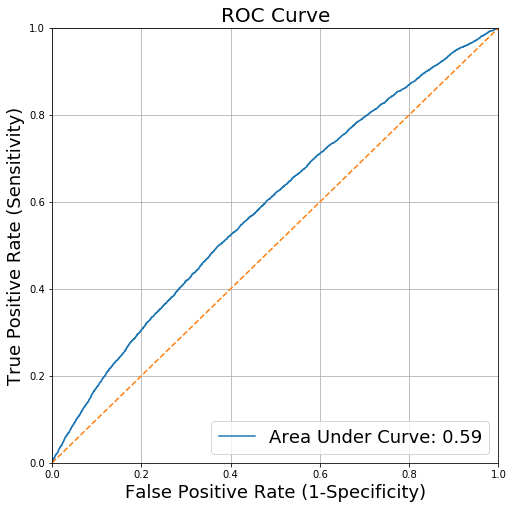

In [60]:
roc_auc(y_test, X_test, logreg)

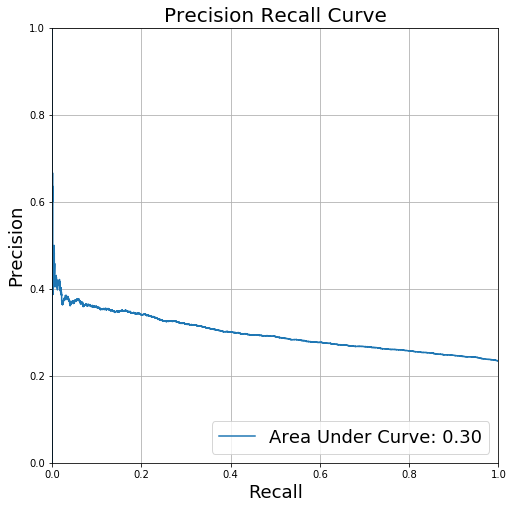

In [61]:
precision_recall(y_test, X_test, logreg)

The baseline logistic regression model was unsuccessful in predicting any defaulters in the test dataset. Precision and recall for the positive class is 0. The accuracy score of 0.76 only reflects the values where Target = 0. The ROC AUC at 0.59 is not much better than randomly guessing classes. Let's see if we can produce better results with parameter tuning.

In [62]:
#Try log reg with different values for c

def reg_param_c(X,y, c_values, test_size):
    c_scores = {}
    for i in c_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
        logreg = LogisticRegression(C = i)
        logreg.fit(X_train, y_train)
        c_scores[i] = accuracy_score(y_test, logreg.predict(X_test))
    return c_scores

reg_param_c(X,y, [0.001, 0.1, 1, 10, 100], 0.3)

{0.001: 0.7614242587155204,
 0.1: 0.7614242587155204,
 1: 0.7614242587155204,
 10: 0.7614242587155204,
 100: 0.7614242587155204}

In [63]:
logreg.predict_proba(X_test)[:20]

array([[0.70304058, 0.29695942],
       [0.76678769, 0.23321231],
       [0.74542006, 0.25457994],
       [0.64696085, 0.35303915],
       [0.79654521, 0.20345479],
       [0.7858823 , 0.2141177 ],
       [0.71754774, 0.28245226],
       [0.76411801, 0.23588199],
       [0.81553379, 0.18446621],
       [0.80403375, 0.19596625],
       [0.75597356, 0.24402644],
       [0.81492571, 0.18507429],
       [0.73529908, 0.26470092],
       [0.86134224, 0.13865776],
       [0.74978414, 0.25021586],
       [0.79475428, 0.20524572],
       [0.77797853, 0.22202147],
       [0.74486942, 0.25513058],
       [0.79860851, 0.20139149],
       [0.7772584 , 0.2227416 ]])

Despite tuning parameters, the probability of predicting a default (Target = 1) is relatively low and we would have to change our threshold significantly from the default of 0.5 to get any predictions for the majority class. Let's try using a Random Forest Classifier next. 

### Random Forest Classifier
We will use random forest, which combines many decision trees to try to accomplish better overall model performance. Let's start with the default parameters.

In [64]:
#import RandomForestClassifier and set random_state for duplicating results

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

Feature Importance for out of the box model.

In [65]:
for feature, importance in zip(X_train.columns, pd.Series(classifier.feature_importances_).sort_values(ascending = False)):
    print('Feature',feature, 'Importance', importance)

Feature AMT_INCOME_TOTAL Importance 0.1455831296481248
Feature APARTMENTS_MODE Importance 0.11926593941441348
Feature BASEMENTAREA_AVG Importance 0.11734131293958558
Feature ENTRANCES_AVG Importance 0.07739772836661646
Feature EXT_SOURCE_1 Importance 0.06415554632237394
Feature EXT_SOURCE_2 Importance 0.06388697700314147
Feature EXT_SOURCE_3 Importance 0.050696563384157144
Feature FLOORSMAX_MODE Importance 0.04549714229503292
Feature LANDAREA_AVG Importance 0.04198282871272429
Feature LIVE_CITY_NOT_WORK_CITY Importance 0.040757845593238064
Feature NONLIVINGAREA_MODE Importance 0.03439800806468304
Feature REGION_POPULATION_RELATIVE Importance 0.02758877885092274
Feature REGION_RATING_CLIENT Importance 0.026741310767410282
Feature REG_CITY_NOT_LIVE_CITY Importance 0.024207155936039136
Feature TOTALAREA_MODE Importance 0.023380878801775716
Feature YEARS_BEGINEXPLUATATION_MODE Importance 0.022279333706319786
Feature YEARS_BIRTH Importance 0.018764374354472712
Feature YEARS_BUILD_MODE Impor

Accuracy score: 0.9166701128985567

Classification report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     18517
          1       0.97      0.67      0.79      5664

avg / total       0.92      0.92      0.91     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18381           136
Actual: 1          1879          3785


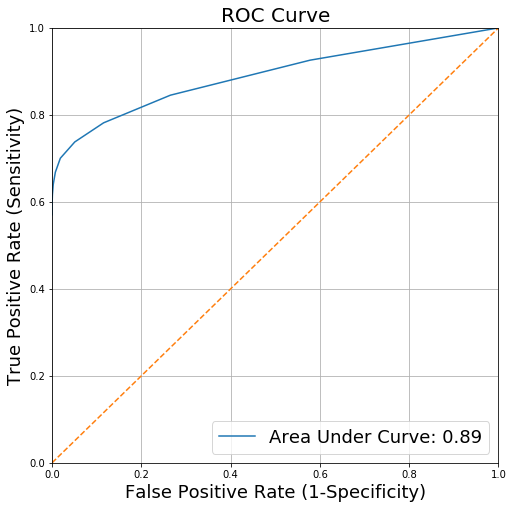

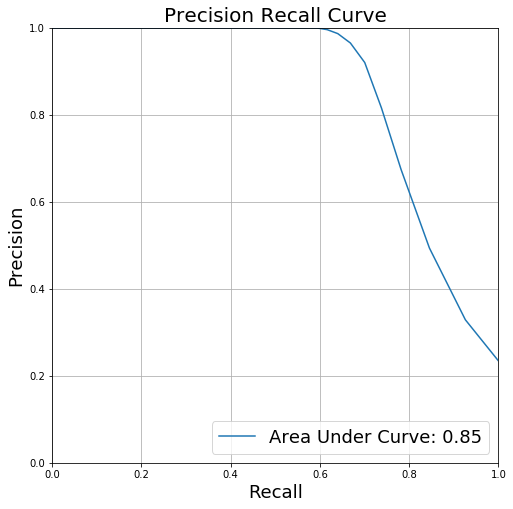

In [66]:
calculate_metrics(y_test, y_pred)
roc_auc(y_test, X_test, rf_classifier)
precision_recall(y_test, X_test, rf_classifier)

The baseline random forest model performed much better than logistic regression, with an accuracy of over 91%. Precision and recall for the positive class is also improved, at 0.97 and 0.67 respectively.The ROC Area Under the Curve is 0.89.

### Hyperparameter Tuning Using RandomizedSearchCV
Baseline predictive power is decent but let us see if we can do better with hyperparameter tuning. Let's start by finding the optimal number of estimators. We will try to compare performance tradeoff versus incremental improvements.

In [67]:
#Find optimal estimators n

for i in range(10,160,10):
    class2 = RandomForestClassifier(n_estimators = i, n_jobs = -1, random_state = 42)
    class2.fit(X_train, y_train)
    y_pred = class2.predict(X_test)
    print('AUC score for', i, 'estimators is:', roc_auc_score(y_test, y_pred))

AUC score for 10 estimators is: 0.8304555237300646
AUC score for 20 estimators is: 0.8369080374760223
AUC score for 30 estimators is: 0.837936200175194
AUC score for 40 estimators is: 0.8382134925106232
AUC score for 50 estimators is: 0.8386351446708461
AUC score for 60 estimators is: 0.8404494941890319
AUC score for 70 estimators is: 0.840008110008241
AUC score for 80 estimators is: 0.8394099041757017
AUC score for 90 estimators is: 0.8391720758814086
AUC score for 100 estimators is: 0.8392603527175669
AUC score for 110 estimators is: 0.8401161188649673
AUC score for 120 estimators is: 0.8410258894407309
AUC score for 130 estimators is: 0.8413104519697734
AUC score for 140 estimators is: 0.8413374541839549
AUC score for 150 estimators is: 0.8412491773477968


Performance did not significantly improve as the number of estimators increased past a certain point. We will try tuning number of estimators again in conjunction with other hyperparameters, as shown below:

In [68]:
classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

We will adjust the following hyperparameters:
- bootstrap: method for sampling data points (with or without replacement)
- max_depth: max levels in each decision tree
- max_features: max features considered for splitting a node
- min_samples_leaf: min number of data points allowed in a leaf node
- min_samples_split: min number of data points put in a node before node is split
- n_estimators: number of trees in the forest

Since it will be too computationally expensive to exhaustively try every single parameter combination, we will use RandomizedSearchCV to take a random subset of possible parameter combinations.

In [69]:
from sklearn.model_selection import RandomizedSearchCV

bootstrap = [True, False]
max_depth = [i for i in range(10,100,10)]
max_depth.append(None)
max_features = ['sqrt', 'log2']
min_samples_leaf = [1, 2, 3, 4, 5]
min_samples_split = [i for i in range(2,12,2)]
n_estimators = [i for i in range(10,110,10)]

In [70]:
random_grid = {'bootstrap': bootstrap,
                'max_depth': max_depth,
                'max_features': max_features,
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split,
                'n_estimators': n_estimators}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [71]:
rf_cv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [72]:
print('Best Parameters:', rf_cv.best_params_)
print('Best Estimator:', rf_cv.best_estimator_)
print('Best Score:', rf_cv.best_score_)

Best Parameters: {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Estimator: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best Score: 0.9191450143561022


In [73]:
rf_cv.grid_scores_

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91427, std: 0.00180, params: {'n_estimators': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False},
 mean: 0.91392, std: 0.00314, params: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True},
 mean: 0.91032, std: 0.00150, params: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False},
 mean: 0.91090, std: 0.00219, params: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False},
 mean: 0.91899, std: 0.00152, params: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False},
 mean: 0.91803, std: 0.00087, params: {'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap':

In [74]:
best_pred = rf_cv.best_estimator_.predict(X_test)

Accuracy score: 0.9239071998676647

Classification report: 
              precision    recall  f1-score   support

          0       0.91      1.00      0.95     18517
          1       0.98      0.69      0.81      5664

avg / total       0.93      0.92      0.92     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18426            91
Actual: 1          1749          3915


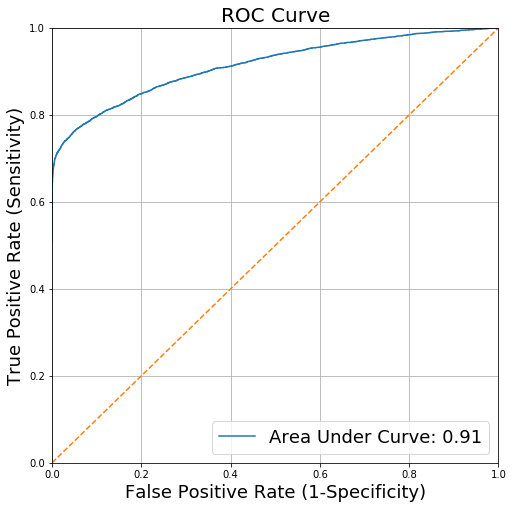

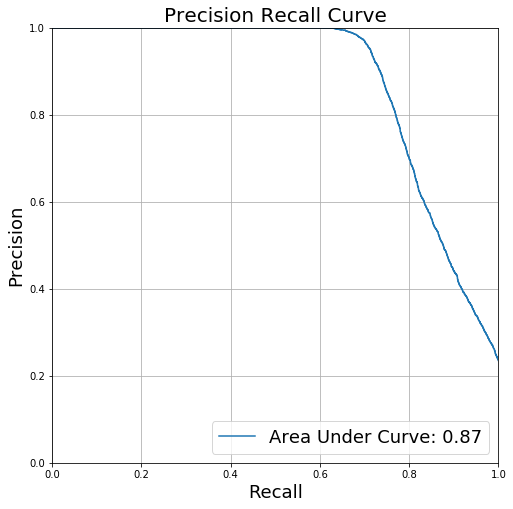

In [75]:
calculate_metrics(y_test, best_pred)
roc_auc(y_test, X_test, rf_cv)
precision_recall(y_test, X_test, rf_cv)

After hyperparameter tuning, we have improved accuracy, ROC AUC, and Precision Recall Curve AUC! Let's see if we can do even better with Extreme Gradient Boosting.

### XGBoost
Extreme Gradient Boosting

In [76]:
import xgboost as xgb

xg_class = xgb.XGBClassifier(random_state = 42)
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy score: 0.9239071998676647

Classification report: 
              precision    recall  f1-score   support

          0       0.91      1.00      0.95     18517
          1       0.98      0.69      0.81      5664

avg / total       0.93      0.92      0.92     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18426            91
Actual: 1          1749          3915


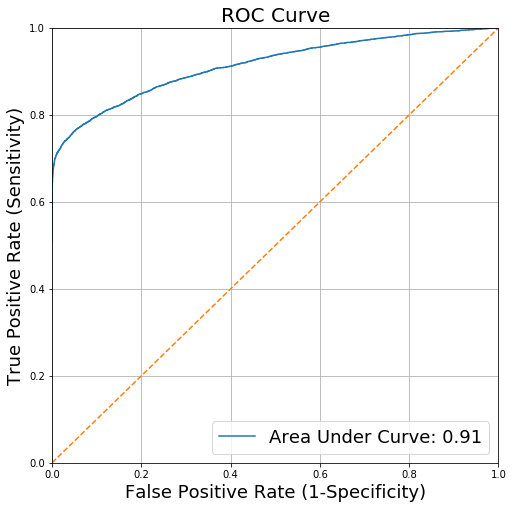

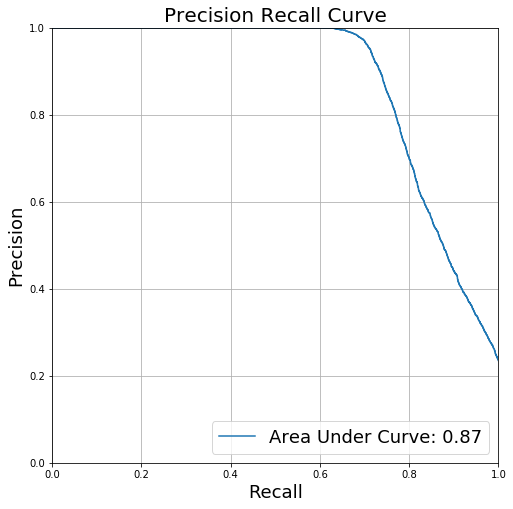

In [77]:
calculate_metrics(y_test, best_pred)
roc_auc(y_test, X_test, rf_cv)
precision_recall(y_test, X_test, rf_cv)

## Hyperparameter Tuning Using GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [1, 3, 5],
              "min_child_weight" : [1,3],
              "n_estimators": [100],
              "learning_rate": [0.05, 0.1,0.16]}
grid_search = GridSearchCV(estimator = xgb.XGBClassifier(), param_grid = param_grid, cv = 3, verbose = 10, n_jobs = -1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5], 'min_child_weight': [1, 3], 'n_estimators': [100], 'learning_rate': [0.05, 0.1, 0.16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [79]:
print('Best Parameters:', grid_search.best_params_)
print('Best Estimator:', grid_search.best_estimator_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'learning_rate': 0.16, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}
Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.16, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Score: 0.9212718443160469


In [80]:
grid_search.grid_scores_

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91985, std: 0.00111, params: {'learning_rate': 0.05, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100},
 mean: 0.91985, std: 0.00111, params: {'learning_rate': 0.05, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 100},
 mean: 0.92042, std: 0.00091, params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100},
 mean: 0.92035, std: 0.00087, params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100},
 mean: 0.92067, std: 0.00098, params: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100},
 mean: 0.92081, std: 0.00119, params: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100},
 mean: 0.91985, std: 0.00111, params: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100},
 mean: 0.91985, std: 0.00111, params: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 100},
 mean: 0.92085, st

In [81]:
best_pred_xgb = grid_search.best_estimator_.predict(X_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy score: 0.9243207476944708

Classification report: 
              precision    recall  f1-score   support

          0       0.92      0.99      0.95     18517
          1       0.96      0.71      0.81      5664

avg / total       0.93      0.92      0.92     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18340           177
Actual: 1          1653          4011


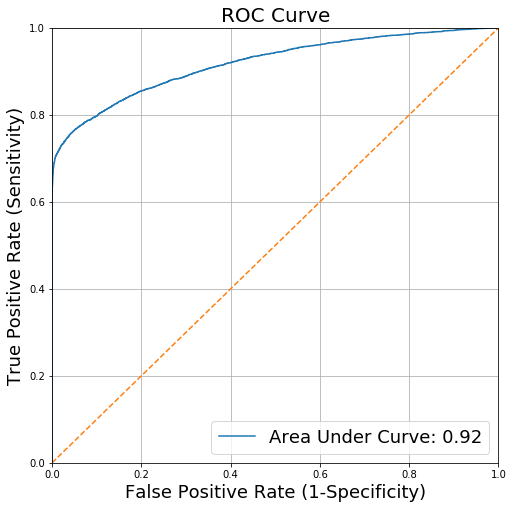

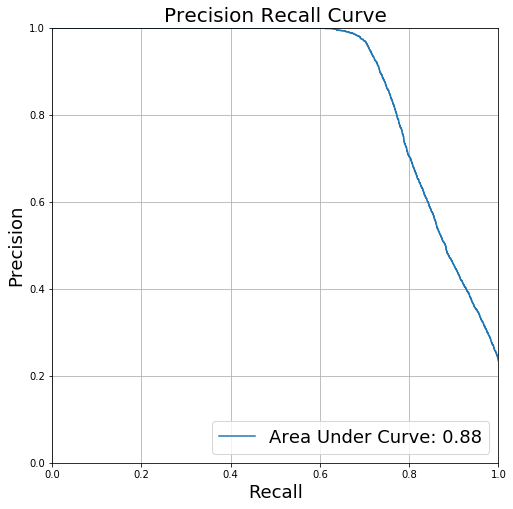

In [82]:
calculate_metrics(y_test, best_pred_xgb)
roc_auc(y_test, X_test, grid_search)
precision_recall(y_test, X_test, grid_search)

### AdaBoost

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
ada.score(X_test,y_test)

0.9198130763822836

Accuracy score: 0.9198130763822836

Classification report: 
              precision    recall  f1-score   support

          0       0.92      0.98      0.95     18517
          1       0.93      0.71      0.81      5664

avg / total       0.92      0.92      0.92     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18198           319
Actual: 1          1620          4044


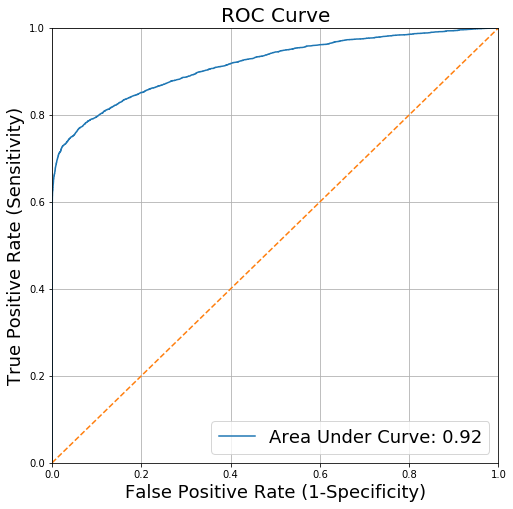

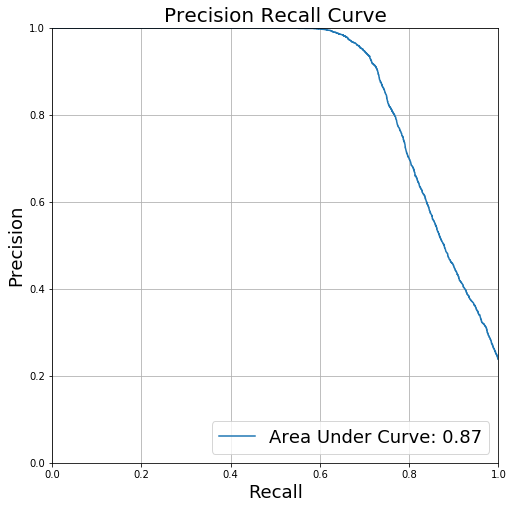

In [88]:
calculate_metrics(y_test, y_pred)
roc_auc(y_test, X_test, ada)
precision_recall(y_test, X_test, ada)

### LightGBM

In [89]:
import lightgbm as lgb

In [90]:
lgb = lgb.LGBMClassifier(random_state = 42)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
lgb.score(X_test, y_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9242793929117903

Accuracy score: 0.9242793929117903

Classification report: 
              precision    recall  f1-score   support

          0       0.92      0.99      0.95     18517
          1       0.96      0.71      0.81      5664

avg / total       0.93      0.92      0.92     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18339           178
Actual: 1          1653          4011


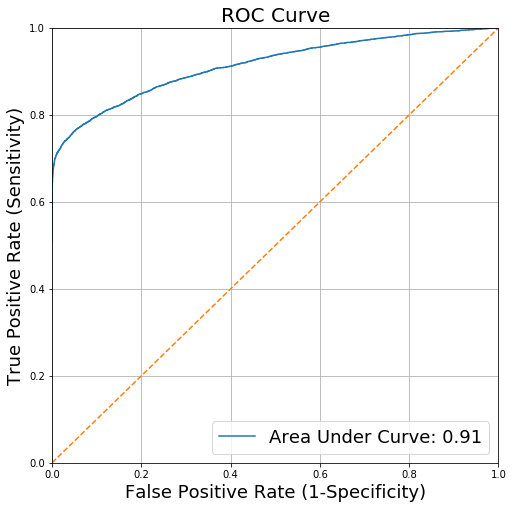

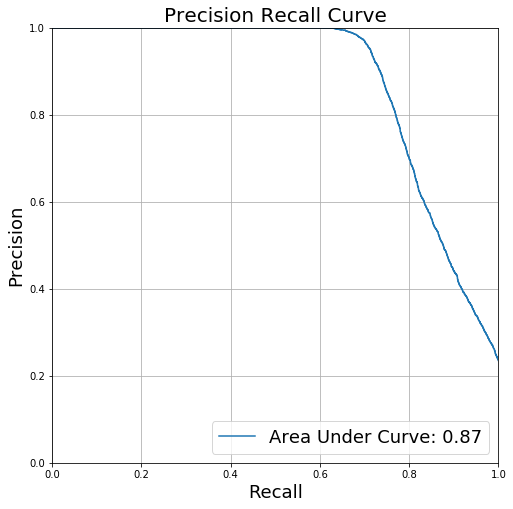

In [91]:
calculate_metrics(y_test, y_pred)
roc_auc(y_test, X_test, rf_cv)
precision_recall(y_test, X_test, rf_cv)

In [92]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1- fpr[thresholds > threshold][-1])

### Naive Bayes

In [93]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [94]:
bern = BernoulliNB(binarize = 0.1)
bern.fit(X_train, y_train)
y_pred = bern.predict(X_test)

Accuracy score: 0.8485174310408998

Classification report: 
              precision    recall  f1-score   support

          0       0.87      0.94      0.91     18517
          1       0.74      0.54      0.63      5664

avg / total       0.84      0.85      0.84     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         17455          1062
Actual: 1          2601          3063


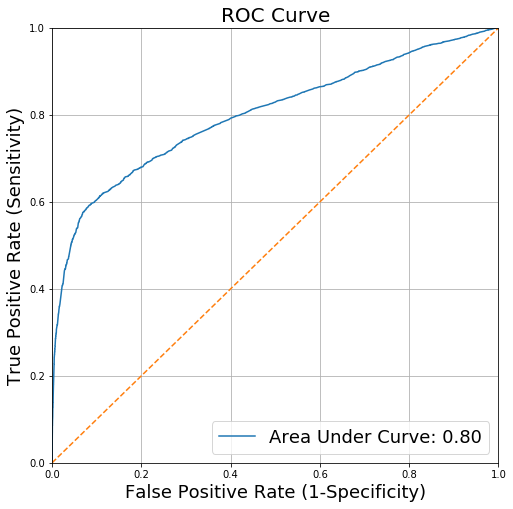

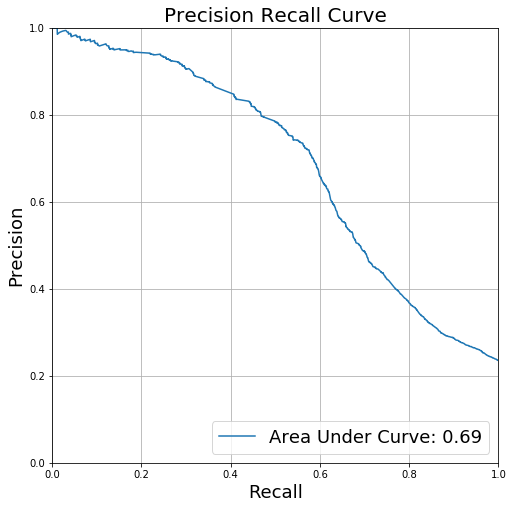

In [95]:
calculate_metrics(y_test, y_pred)
roc_auc(y_test, X_test, bern)
precision_recall(y_test, X_test, bern)

In [96]:
multi = MultinomialNB()
multi.fit(X_train, y_train)
y_pred = multi.predict(X_test)

Accuracy score: 0.7445101525991481

Classification report: 
              precision    recall  f1-score   support

          0       0.82      0.86      0.84     18517
          1       0.45      0.37      0.41      5664

avg / total       0.73      0.74      0.74     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         15899          2618
Actual: 1          3560          2104


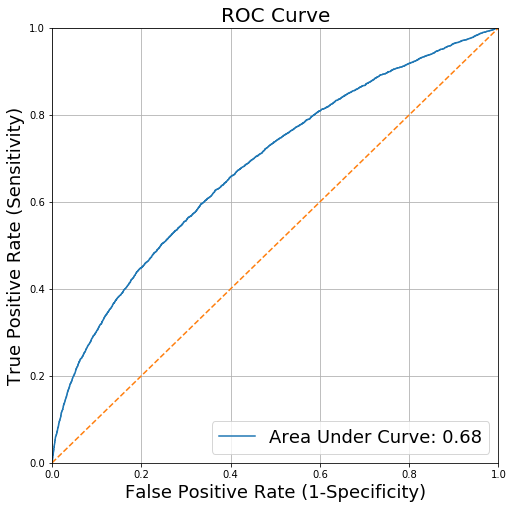

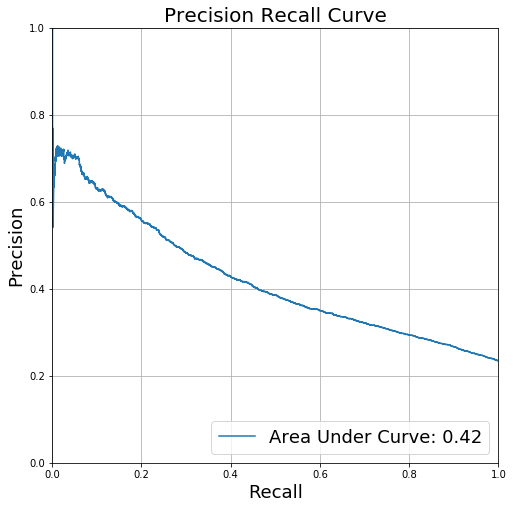

In [97]:
calculate_metrics(y_test, y_pred)
roc_auc(y_test, X_test, multi)
precision_recall(y_test, X_test, multi)

In [98]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)

Accuracy score: 0.7661800587237914

Classification report: 
              precision    recall  f1-score   support

          0       0.77      1.00      0.87     18517
          1       0.92      0.00      0.00      5664

avg / total       0.80      0.77      0.67     24181


Confusion matrix: 
            Predicted: 0  Predicted: 1
Actual: 0         18516             1
Actual: 1          5653            11


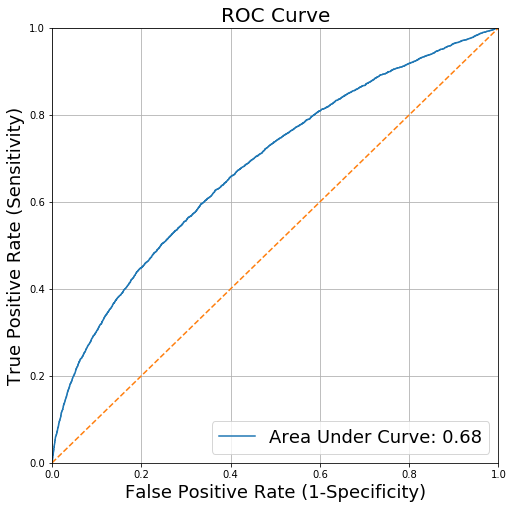

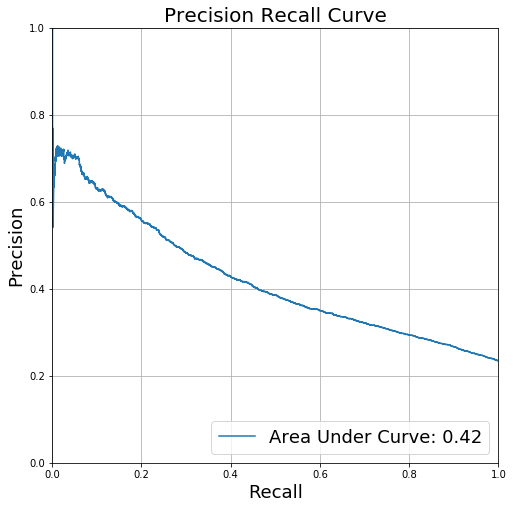

In [99]:
calculate_metrics(y_test, y_pred)
roc_auc(y_test, X_test, multi)
precision_recall(y_test, X_test, multi)